This notebook includes some of the (3D) plots from the lecture but uses the notebook backend of matplotlib so that you can interactively rotate then with a mouse (or similar). 

This should given you a better feel for 2D planes in 3D, whether points and vectors are in these subspaces or not, etc.

In [1]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import scipy.linalg as sl

# Example 1

This is the case with 

$$ A =
\begin{pmatrix}
-2 & -4 & -20 \\
2 & 6 & 24 \\
2 & 10 & 32
\end{pmatrix}
$$

which maps $\mathbb{R}^3$ into $\mathbb{R}^3$, but for which we established in class that the rank of $A$ is only two, i.e. it maps vectors to a 2D subspace within $\mathbb{R}^3$. 

We plotted how points transformed to establish this. 

But this is easier to see if we rotate the transformed space - here I've increased the number of points:

<IPython.core.display.Javascript object>


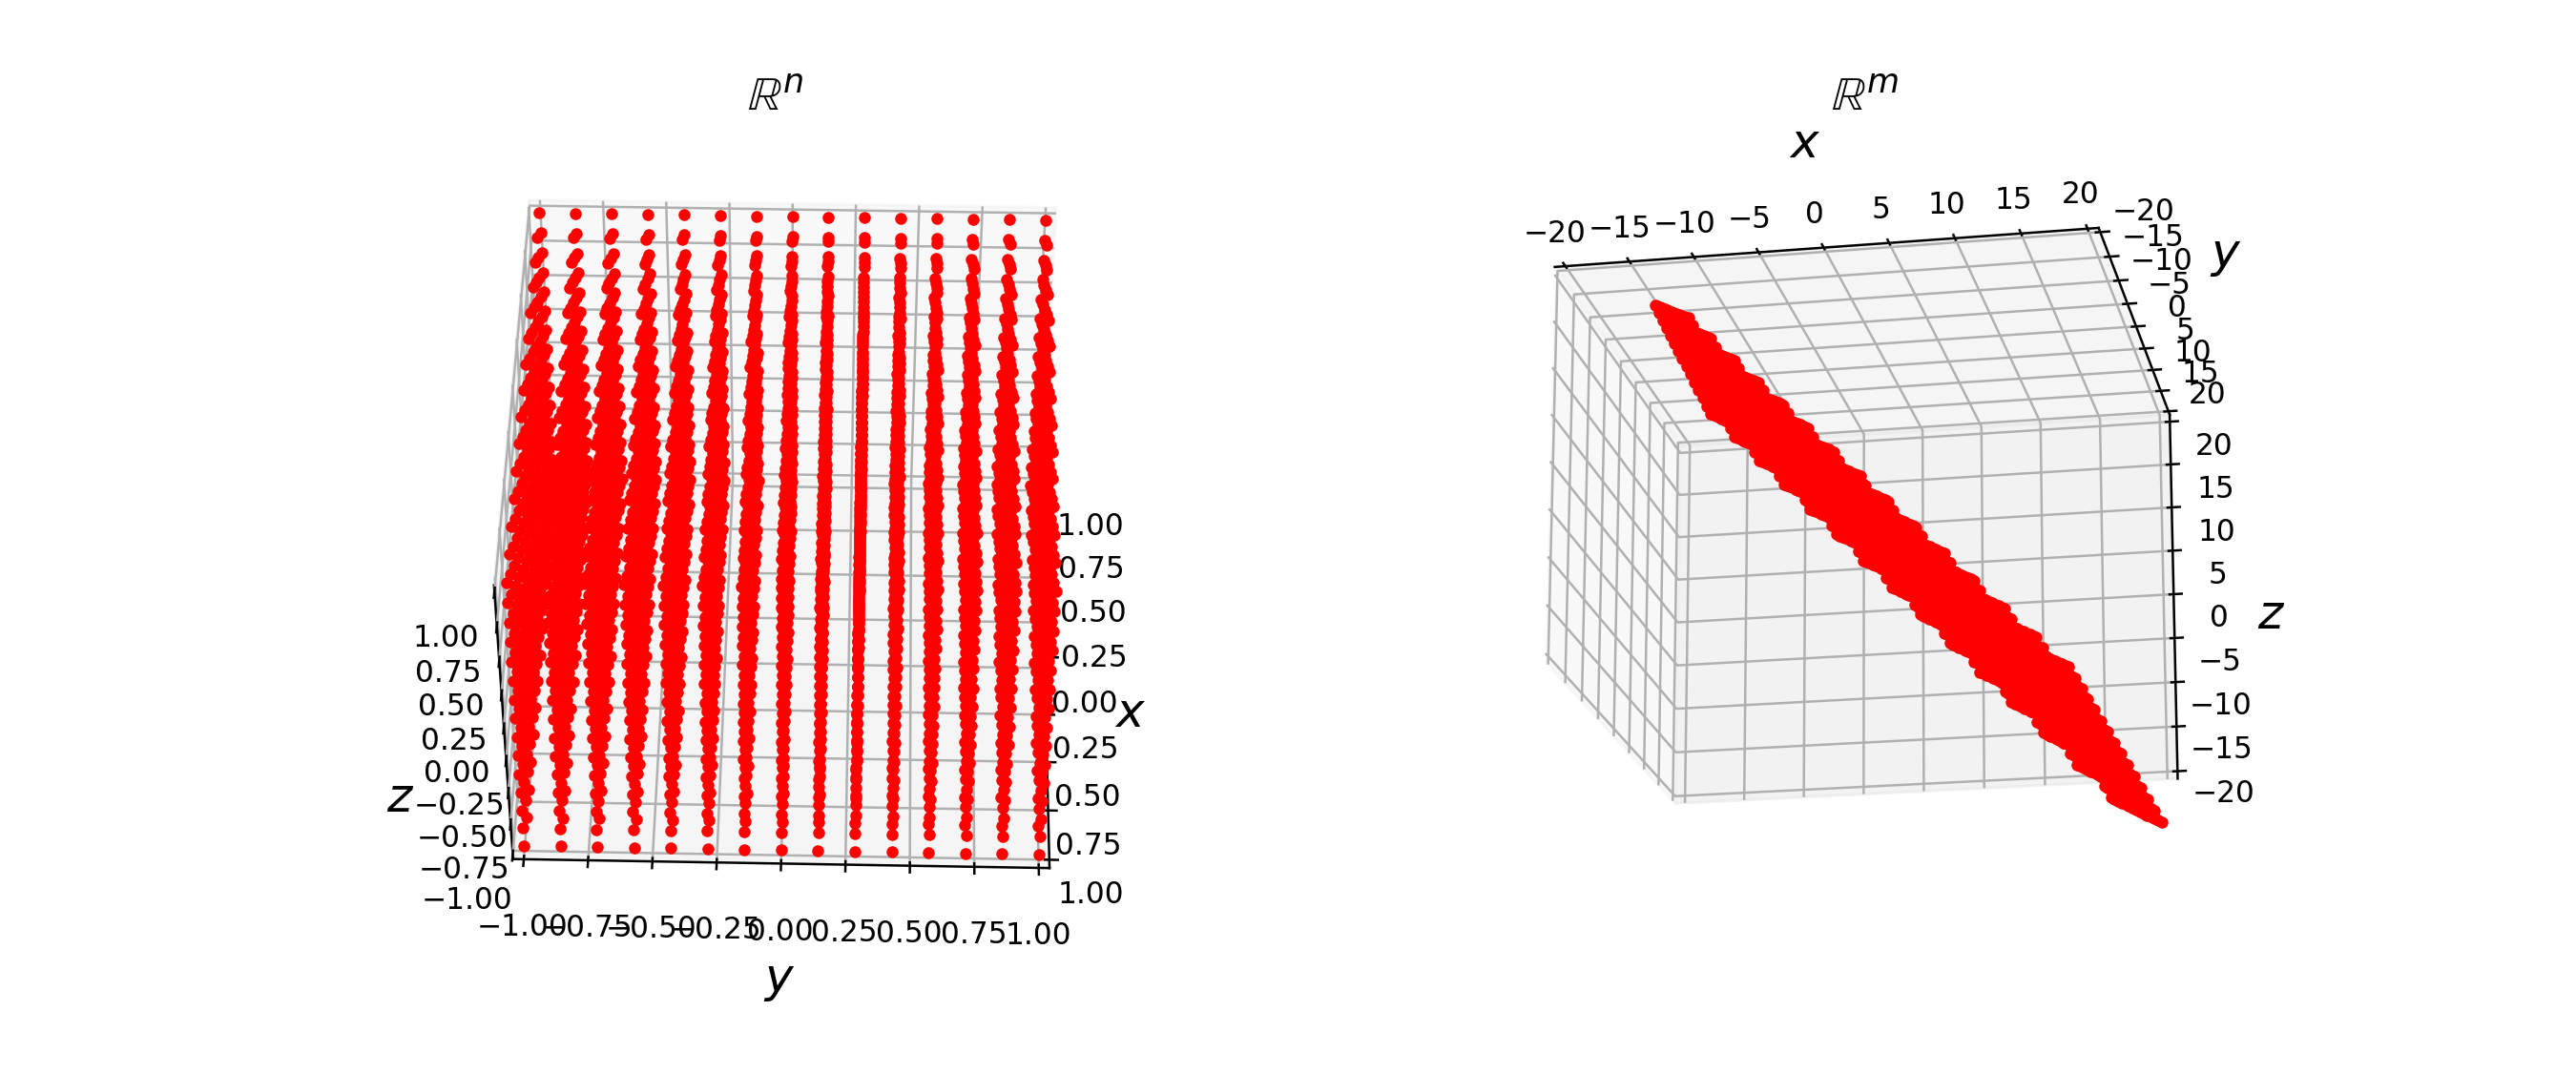

(-20.0, 20.0)

In [2]:
# let's plot the transformation

A = np.array([[-2, -4, -20], [2 , 6 , 24], [2, 10, 32]])

# construct some points in 3D space
x = np.linspace(-1, 1, 15)
y = np.linspace(-1, 1, 15)
z = np.linspace(-1, 1, 15)
# this creates a mesh of points in 2D
xx, yy, zz = np.meshgrid(x, y, z)
# convert to row vectors
xxx = np.reshape(xx,(1,np.size(xx)))
yyy = np.reshape(yy,(1,np.size(yy)))
zzz = np.reshape(zz,(1,np.size(zz)))
# convert to a 2 x N matrix of vectors/points
vecs = np.vstack((xxx,yyy,zzz))

# transform these points
Avecs = A@vecs

# plot
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax1.plot(vecs[0,:], vecs[1,:], vecs[2,:], 'r.')
ax1.set_xlabel('$x$', fontsize = 16)
ax1.set_ylabel('$y$', fontsize = 16)
ax1.set_zlabel('$z$', fontsize = 16)
ax1.set_title('$\mathbb{R}^n$', fontsize = 16)
ax1.set_xlim3d(-1, 1)
ax1.set_ylim3d(-1, 1)
ax1.set_zlim3d(-1, 1)
                      
ax2 = fig.add_subplot(1, 2, 2, projection='3d')
ax2.plot(Avecs[0,:], Avecs[1,:], Avecs[2,:], 'r.')
ax2.set_xlabel('$x$', fontsize = 16)
ax2.set_ylabel('$y$', fontsize = 16)
ax2.set_zlabel('$z$', fontsize = 16)
ax2.set_title('$\mathbb{R}^m$', fontsize = 16)
ax2.set_xlim3d(-20, 20)
ax2.set_ylim3d(-20, 20)
ax2.set_zlim3d(-20, 20)

# Example 2

This is the case 

$$
\begin{align*}
  2x + 3y &= 7 \\[5pt]
   x - 4y &= 3 \\[5pt]
  -3x - 10y & = -11
\end{align*}
   \quad \iff \quad
  \begin{pmatrix}
    2 & 3 \\
    1 & -4  \\
    -3 & -10 
  \end{pmatrix}
  \begin{pmatrix}
    x \\
    y 
  \end{pmatrix}=
  \begin{pmatrix}
    7 \\
    3 \\
    -11
  \end{pmatrix}   
$$

We saw in class that this does have as solution - the blue star left maps to the left star right:

<IPython.core.display.Javascript object>


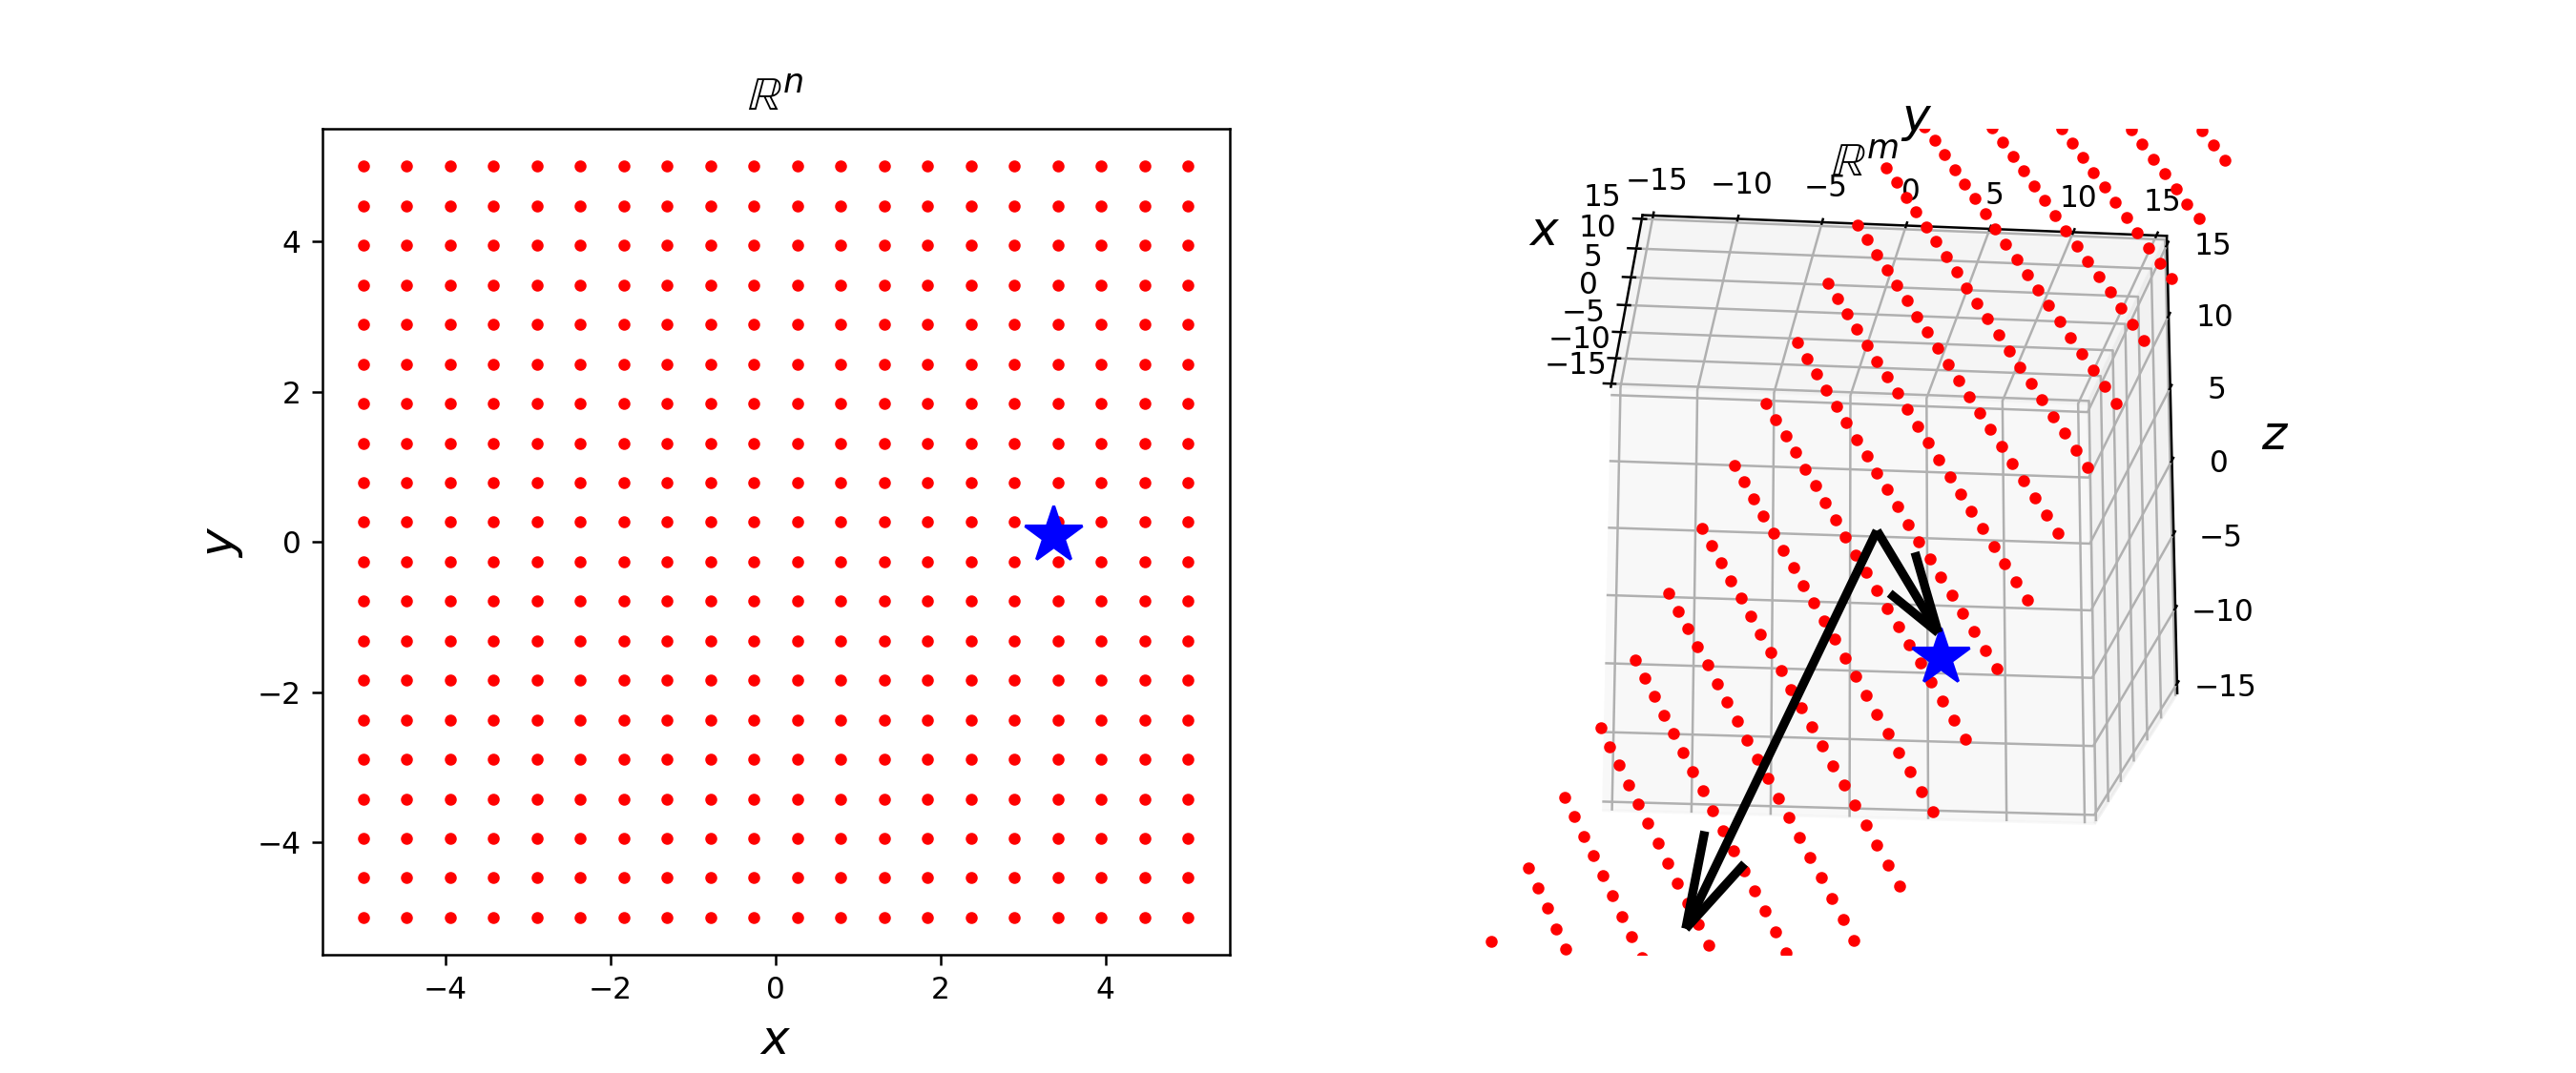

[  7.   3. -11.]


In [3]:
# let's plot the transformation

A = np.array([[2, 3], [1, -4], [-3, -10]])

x = np.linspace(-5, 5, 20)
y = np.linspace(-5, 5, 20)
# this creates a mesh of points in 2D
xx, yy = np.meshgrid(x, y)
# convert to row vectors
xxx = np.reshape(xx,(1,np.size(xx)))
yyy = np.reshape(yy,(1,np.size(yy)))
# convert to a 2 x N matrix of vectors/points
vecs = np.vstack((xxx,yyy))

# transform these points
Avecs = A@vecs

fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(vecs[0,:], vecs[1,:], 'r.')
ax1.set_xlabel('$x$', fontsize = 16)
ax1.set_ylabel('$y$', fontsize = 16)
ax1.set_title('$\mathbb{R}^n$', fontsize = 16)
# add a blue star for our solution
ax1.plot(37./11,1./11, 'b*',markersize=20)

ax2 = fig.add_subplot(1, 2, 2, projection='3d')
ax2.plot(Avecs[0,:], Avecs[1,:], Avecs[2,:], 'r.')
ax2.set_xlabel('$x$', fontsize = 16)
ax2.set_ylabel('$y$', fontsize = 16)
ax2.set_zlabel('$z$', fontsize = 16)
ax2.set_title('$\mathbb{R}^m$', fontsize = 16)
ax2.set_xlim3d(-15, 15)
ax2.set_ylim3d(-15, 15)
ax2.set_zlim3d(-15, 15)
# add a blue star for the RHS vector
ax2.plot([7],[3],[-11],'b*',markersize=20)

# add the column vectors
vec1 = A[:,0]; vec2 = A[:,1]
ax2.quiver(0, 0, 0, vec1[0], vec1[1], vec1[2], length =3, linewidths=3, color='black', arrow_length_ratio=0.6, label='column 1 direction')
ax2.quiver(0, 0, 0, vec2[0], vec2[1], vec2[2], length =3, linewidths=3, color='black', arrow_length_ratio=0.2, label='column 2 direction')

# print out A@b
print(A@np.array([37./11,1./11]))

# Example 3

The following is the case 

$$
\begin{align*}
  2x + 3y &= 7 \\[5pt]
   x - 4y &= 3 \\[5pt]
   x + 10y & = -1
\end{align*}
   \quad \iff \quad
  \begin{pmatrix}
    2 & 3 \\
    1 & -4  \\
    1 & 10 
  \end{pmatrix}
  \begin{pmatrix}
    x \\
    y 
  \end{pmatrix}=
  \begin{pmatrix}
    7 \\
    3 \\
    -1
  \end{pmatrix}   
$$

The blue star right representing the RHS vector does not lie in the subspace mapped by the matrix and so this problem does not have an exact solution.

<IPython.core.display.Javascript object>


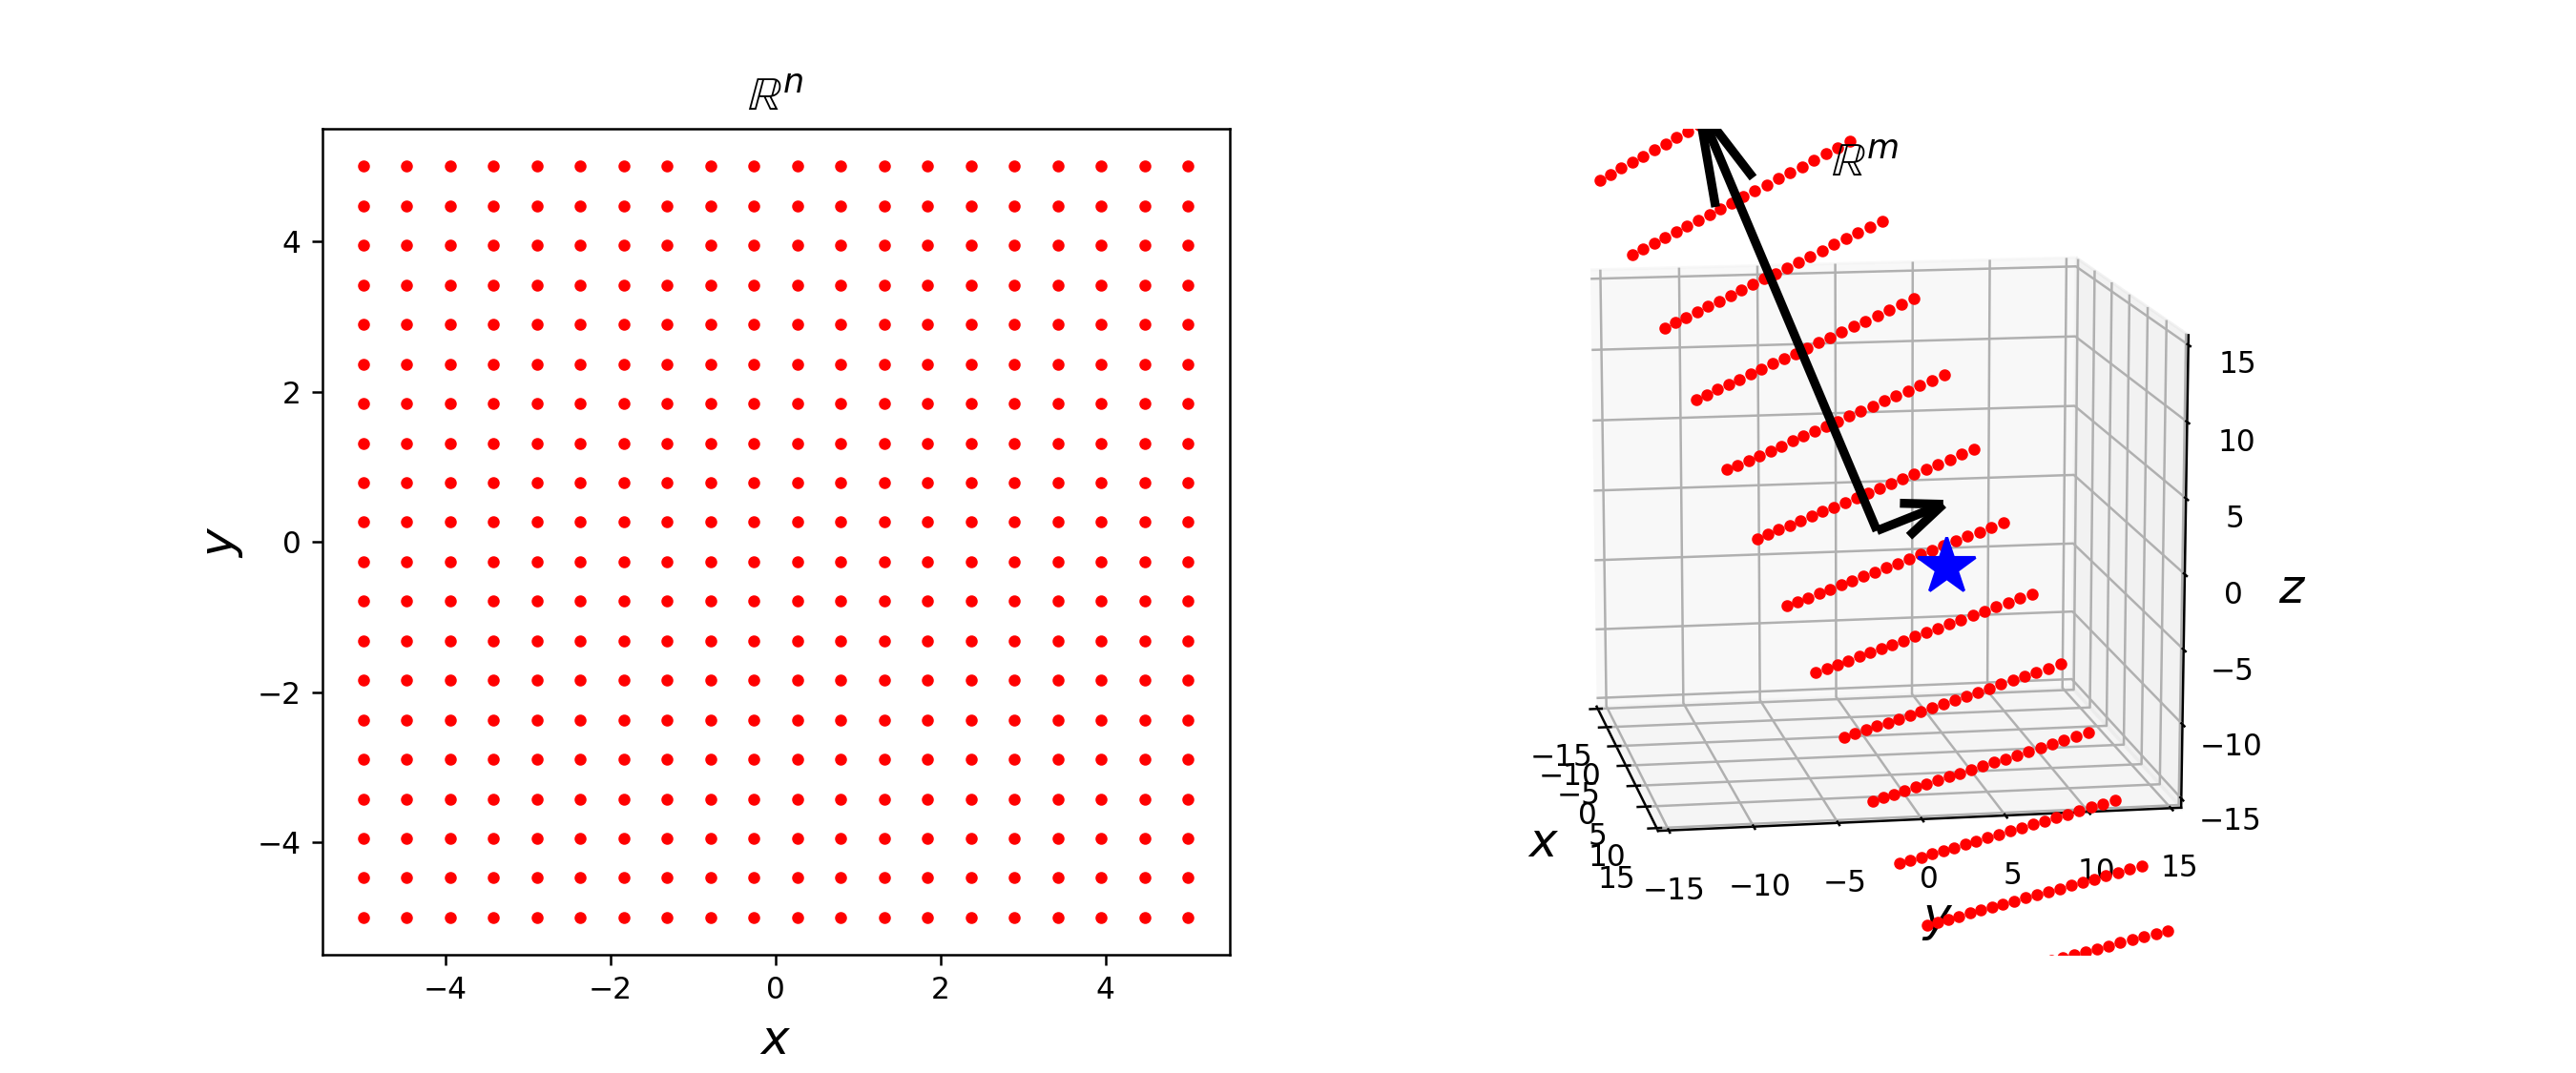

In [4]:
# let's plot the transformation

A = np.array([[2, 3], [1, -4], [1, 10]])

x = np.linspace(-5, 5, 20)
y = np.linspace(-5, 5, 20)
# this creates a mesh of points in 2D
xx, yy = np.meshgrid(x, y)
# convert to row vectors
xxx = np.reshape(xx,(1,np.size(xx)))
yyy = np.reshape(yy,(1,np.size(yy)))
# convert to a 2 x N matrix of vectors/points
vecs = np.vstack((xxx,yyy))

# transform these points
Avecs = A@vecs

fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(vecs[0,:], vecs[1,:], 'r.')
ax1.set_xlabel('$x$', fontsize = 16)
ax1.set_ylabel('$y$', fontsize = 16)
ax1.set_title('$\mathbb{R}^n$', fontsize = 16)

ax2 = fig.add_subplot(1, 2, 2, projection='3d')
ax2.plot(Avecs[0,:], Avecs[1,:], Avecs[2,:], 'r.')
ax2.set_xlabel('$x$', fontsize = 16)
ax2.set_ylabel('$y$', fontsize = 16)
ax2.set_zlabel('$z$', fontsize = 16)
ax2.set_title('$\mathbb{R}^m$', fontsize = 16)
ax2.set_xlim3d(-15, 15)
ax2.set_ylim3d(-15, 15)
ax2.set_zlim3d(-15, 15)
# add a blue star for the RHS vector
ax2.plot([7],[3],[-1],'b*',markersize=20)

# add the column vectors
vec1 = A[:,0]; vec2 = A[:,1]
ax2.quiver(0, 0, 0, vec1[0], vec1[1], vec1[2], length =3, linewidths=3, color='black', arrow_length_ratio=0.6, label='column 1 direction')
ax2.quiver(0, 0, 0, vec2[0], vec2[1], vec2[2], length =3, linewidths=3, color='black', arrow_length_ratio=0.2, label='column 2 direction')


# Example 3 continued

Next we computed the least squares solution.

The blue star right still gives our exact RHS, the back star left shows the least squares solution and the black star right the location it maps to

<IPython.core.display.Javascript object>


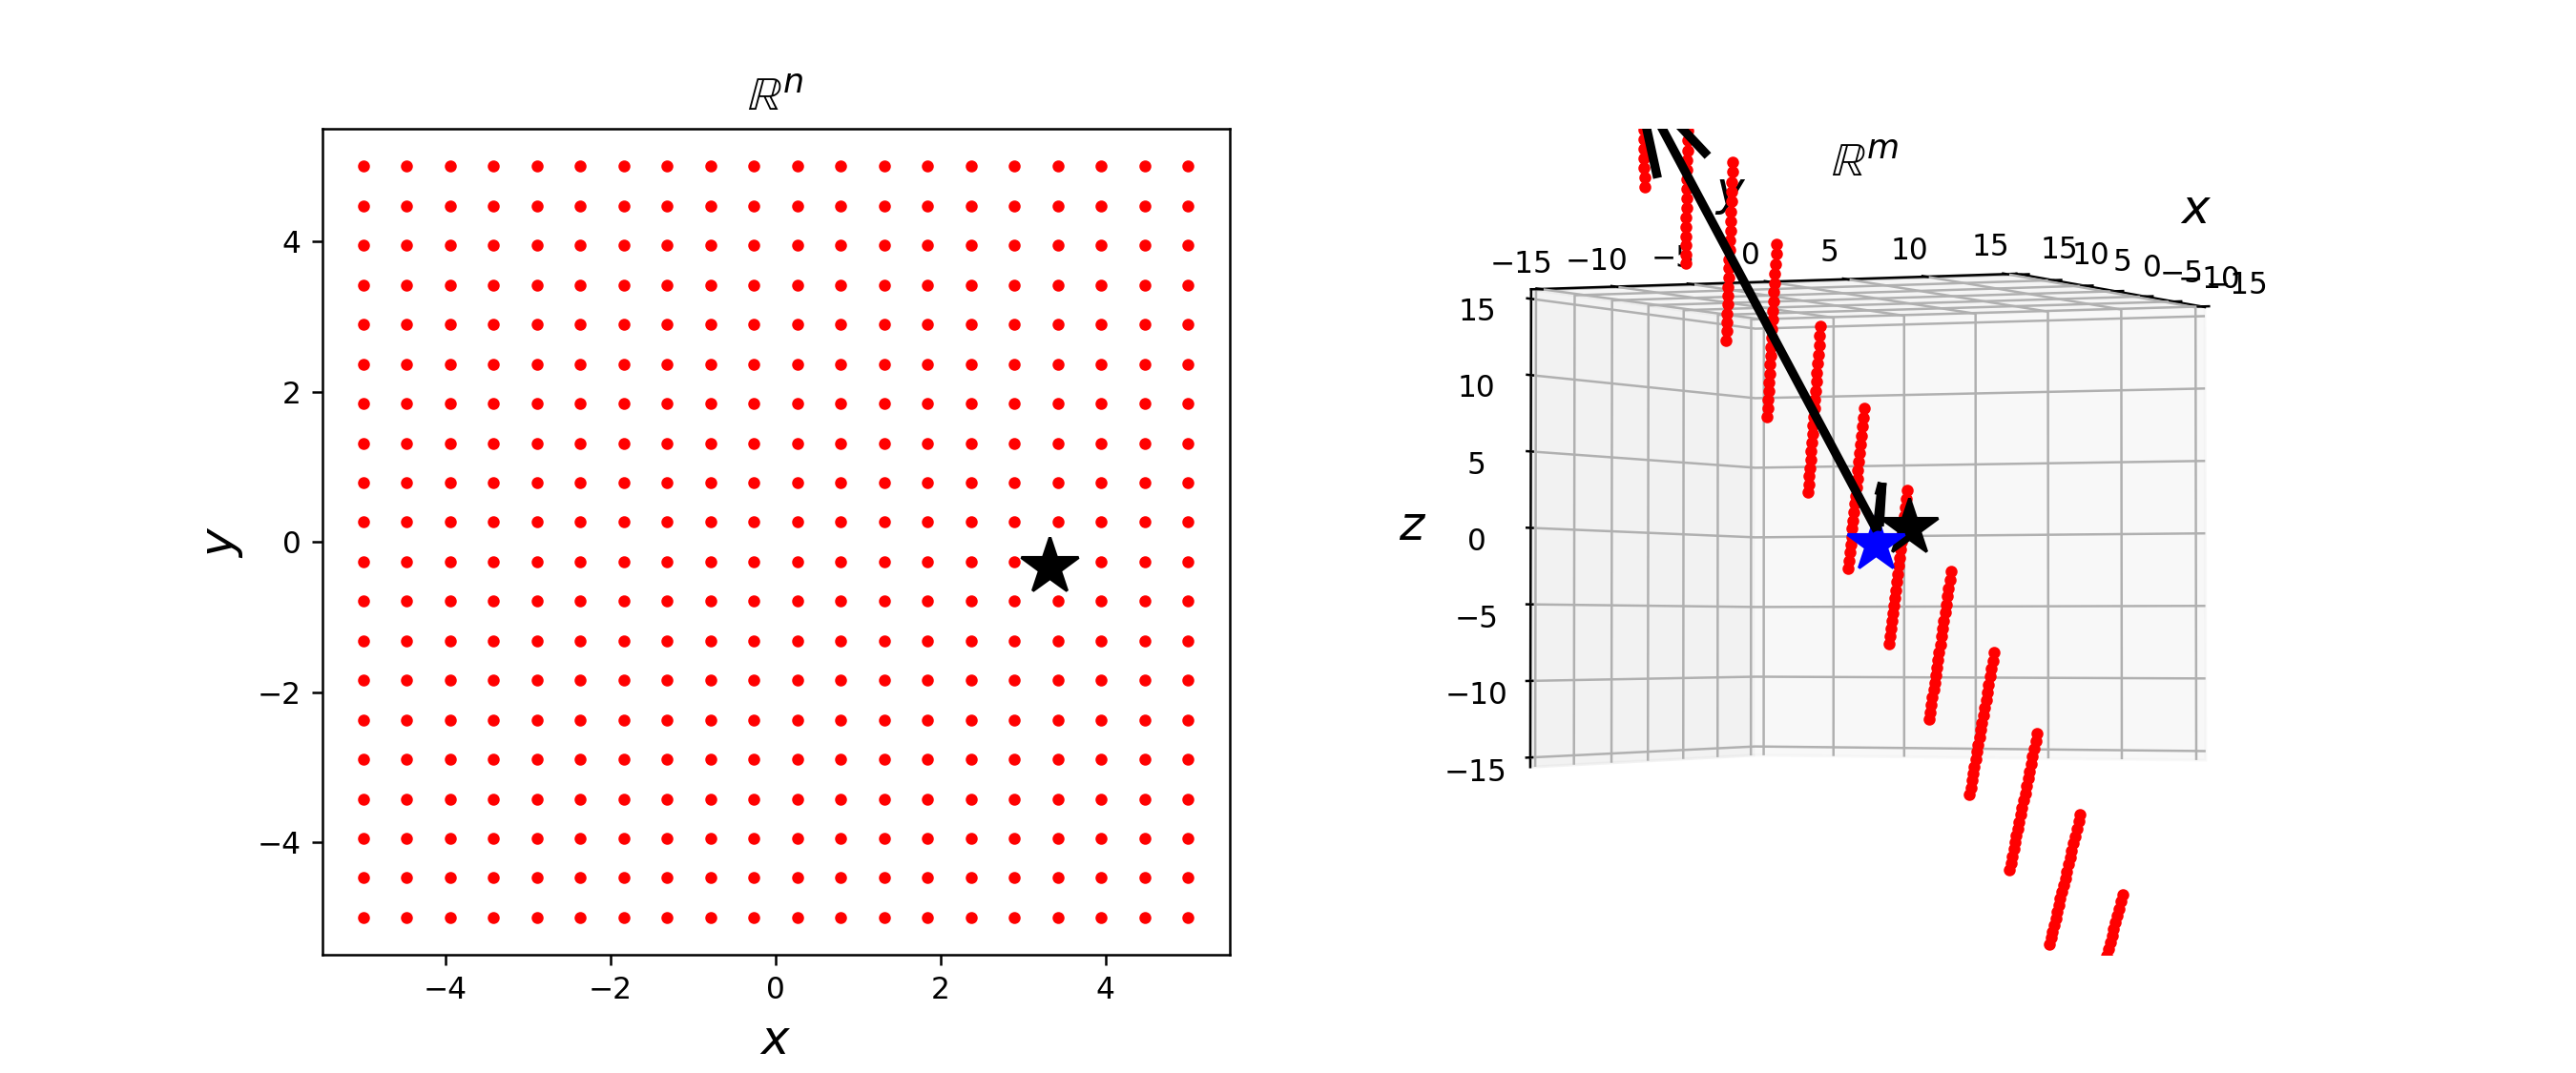

In [7]:
# let's plot the transformation

A = np.array([[2, 3], [1, -4], [1, 10]])

x = np.linspace(-5, 5, 20)
y = np.linspace(-5, 5, 20)
# this creates a mesh of points in 2D
xx, yy = np.meshgrid(x, y)
# convert to row vectors
xxx = np.reshape(xx,(1,np.size(xx)))
yyy = np.reshape(yy,(1,np.size(yy)))
# convert to a 2 x N matrix of vectors/points
vecs = np.vstack((xxx,yyy))

# transform these points
Avecs = A@vecs

# LS solution
ATA = A.T @ A
b = np.array([7,3,-1])
rhs = A.T @ b
ls_sol = sl.solve(ATA, rhs)

# plot
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(vecs[0,:], vecs[1,:], 'r.')
ax1.set_xlabel('$x$', fontsize = 16)
ax1.set_ylabel('$y$', fontsize = 16)
ax1.set_title('$\mathbb{R}^n$', fontsize = 16)
# add a black star for our LS solution
ax1.plot(ls_sol[0],ls_sol[1], 'k*',markersize=20)

ax2 = fig.add_subplot(1, 2, 2, projection='3d')
ax2.plot(Avecs[0,:], Avecs[1,:], Avecs[2,:], 'r.')
ax2.set_xlabel('$x$', fontsize = 16)
ax2.set_ylabel('$y$', fontsize = 16)
ax2.set_zlabel('$z$', fontsize = 16)
ax2.set_title('$\mathbb{R}^m$', fontsize = 16)
ax2.set_xlim3d(-15, 15)
ax2.set_ylim3d(-15, 15)
ax2.set_zlim3d(-15, 15)
# black star for A@ls_sol
Als_sol = A@ls_sol
ax2.plot([Als_sol[0]],[Als_sol[1]],[Als_sol[2]],'k*',markersize=20)
# blue star for our RHS vector
ax2.plot([b[0]],[b[1]],[b[2]],'b*',markersize=20)

# add the column vectors
vec1 = A[:,0]; vec2 = A[:,1]
ax2.quiver(0, 0, 0, vec1[0], vec1[1], vec1[2], length =3, linewidths=3, color='black', arrow_length_ratio=0.6, label='column 1 direction')
ax2.quiver(0, 0, 0, vec2[0], vec2[1], vec2[2], length =3, linewidths=3, color='black', arrow_length_ratio=0.2, label='column 2 direction')

Now I will plot the two column vectors (the black arrows in the figure above) in black, and the vector representing the difference between the exact RHS and the RHS obtained with the least squares solution in red

<IPython.core.display.Javascript object>


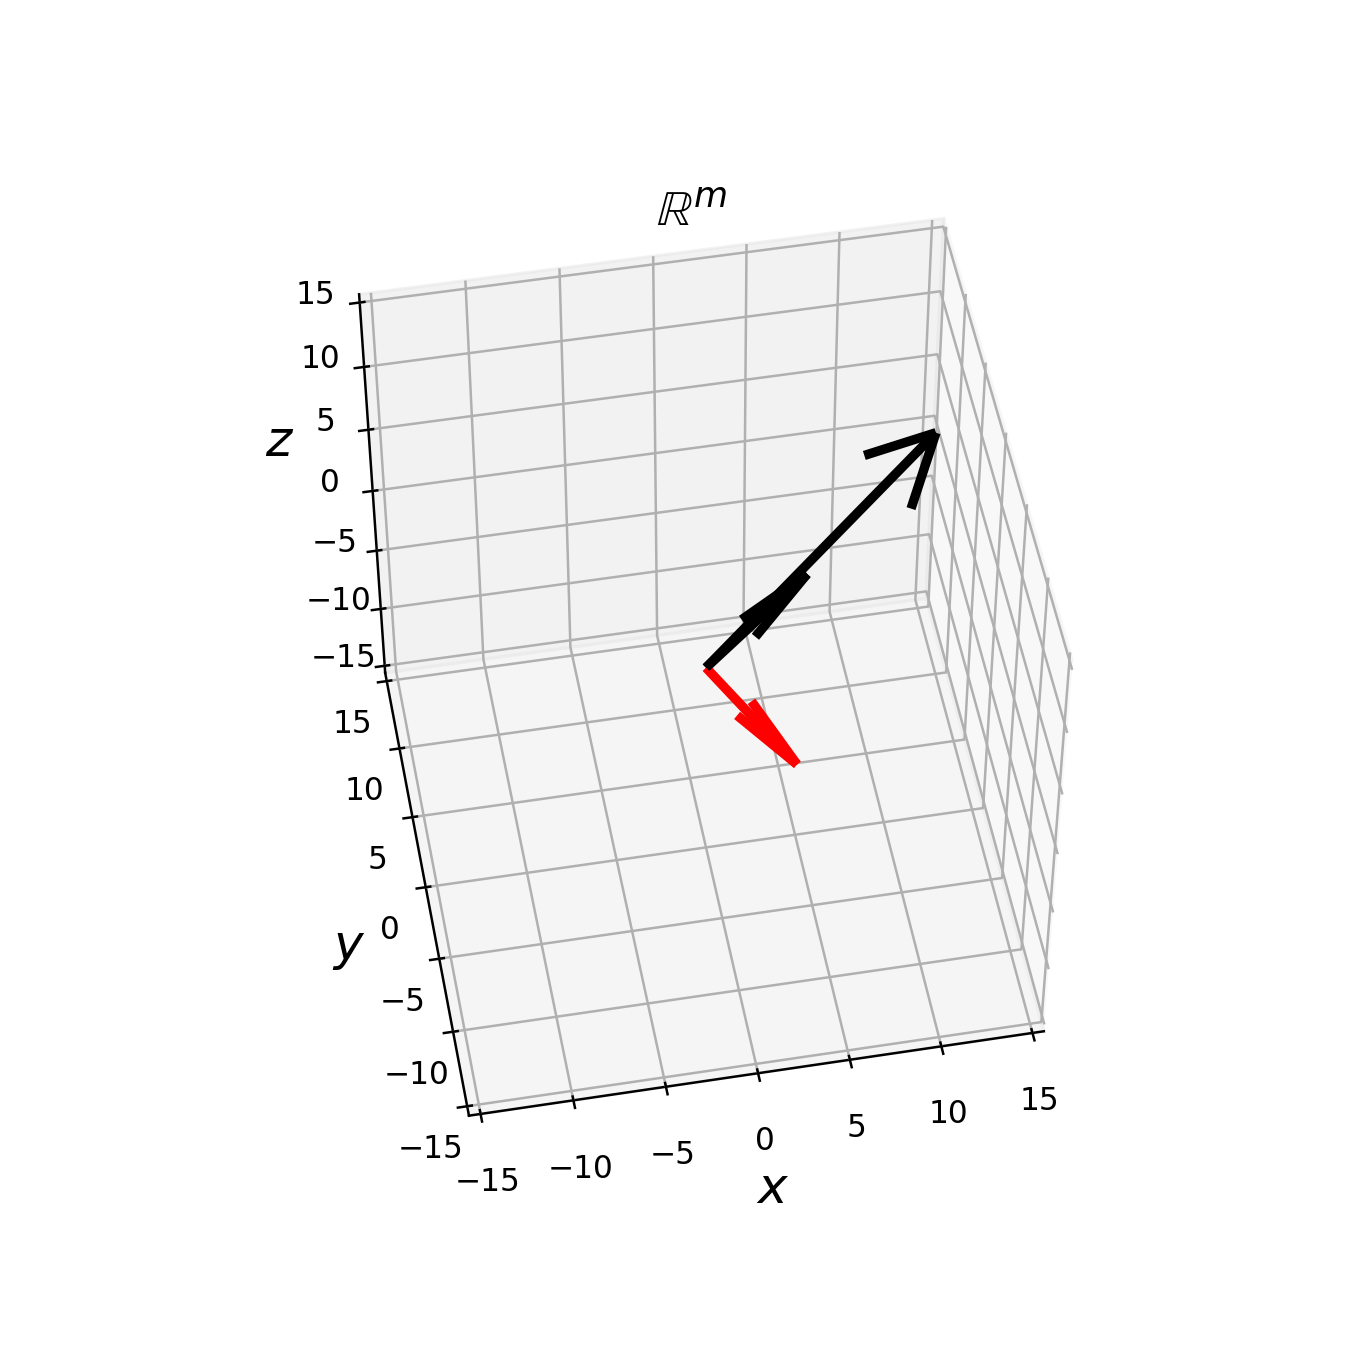

In [6]:
# let's plot the transformation

A = np.array([[2, 3], [1, -4], [1, 10]])

# LS solution
ATA = A.T @ A
b = np.array([7,3,-1])
rhs = A.T @ b
ls_sol = sl.solve(ATA, rhs)

# plot
fig = plt.figure(figsize=(6, 6))

ax2 = fig.add_subplot(1, 1, 1, projection='3d')

ax2.set_xlabel('$x$', fontsize = 16)
ax2.set_ylabel('$y$', fontsize = 16)
ax2.set_zlabel('$z$', fontsize = 16)
ax2.set_title('$\mathbb{R}^m$', fontsize = 16)
ax2.set_xlim3d(-15, 15)
ax2.set_ylim3d(-15, 15)
ax2.set_zlim3d(-15, 15)

# add the column vectors
vec1 = A[:,0]; vec2 = A[:,1]
ax2.quiver(0, 0, 0, vec1[0], vec1[1], vec1[2], length =3, linewidths=3, color='black', arrow_length_ratio=0.6, label='column 1 direction')
ax2.quiver(0, 0, 0, vec2[0], vec2[1], vec2[2], length =3, linewidths=3, color='black', arrow_length_ratio=0.2, label='column 2 direction')

# add a vector representing the difference between the true RHS vector and the RHS obtained with the LS solution
vec3 = b - A@ls_sol
ax2.quiver(0, 0, 0, vec3[0], vec3[1], vec3[2], length =3, linewidths=3, color='red', arrow_length_ratio=0.6, label='column 1 direction')
